In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

import scipy
import numpy as np
from scipy import interpolate
from io import StringIO

# Reading data

CSV format

In [2]:
#from bigfloat import *

def isNaN(string):
    return string != string
print(isNaN("hello"))
print(isNaN(np.nan))

False
True


Muninn format

In [3]:
res=1
vars=["m", "beta", "psi", "derpsi"]
time=[]
grid=[]
m=[]
beta=[]
psi=[]
derpsi=[]
k=1

for var in vars:
    #dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res1/{}.txt".format(var)
    
    #dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res1/{}.txt".format(var)
    
    dir = "/home/rita13santos/Desktop/run17/{}.txt".format(var)
    #dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/08-06/res1/{}.txt".format(var)
    
    #dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/30-05/run20/res1/{}.txt".format(var)
    #dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/28-06/N200,dt=2.5e-5/res1/{}.txt".format(var)
    print(dir)

    with open(dir) as f:
        for line in f:

            index = line.find("Time")
            if index==1:
                if k==1:
                    time.append(float(line[index+7:len(line)-1]))
                auxgrid=[]
                auxdata=[]
                

            else:
                a=line.split()
                if a!=[]:
                    if k==1:
                        auxgrid.append(float(a[0]))
                    auxdata.append(float(a[1]))
                elif a==[]:
                    grid.append(auxgrid)
                    if k==1:
                        m.append(auxdata)
                    elif k==2:
                        beta.append(auxdata)
                    elif k==3:
                        psi.append(auxdata)
                    elif k==4:
                        derpsi.append(auxdata)
                    
    k=k+1

#count=len(datatime[2])+1
#count

/home/rita13santos/Desktop/run17/m.txt
/home/rita13santos/Desktop/run17/beta.txt
/home/rita13santos/Desktop/run17/psi.txt
/home/rita13santos/Desktop/run17/derpsi.txt


In [4]:
"""dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/timearray1.csv"
time=[]

with open(dir) as f:
    with pd.option_context('display.precision', 20):
        df = pd.read_csv(dir, header=None, dtype = str)
        
        df = df.to_numpy()
        df = np.transpose(df)

time = [float(t) for t in df[0]]
print(time)""";

CSV format

In [5]:
"""step=10
run=20

#dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/28-05/bisectionsearchN7500/run{}".format(run)
dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/08-06/run20"

    

count=0
for path in os.listdir(dir):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir, path)):
        count += 1
print('File count in dir', dir, 'is: ', count)


m=[]
beta=[]
psi=[]
derpsi=[]
grid=[]
    
#iterate over files in dir
for i in range(count-1):
    with pd.option_context('display.precision', 20):
        df = pd.read_csv(dir + "/time_step{}.csv".format(i*step), header=None, dtype = str)
    df = df.to_numpy()
    df = np.transpose(df)
        
    aux = [float(x) for x in df[0]]
    m.append(aux)
    aux = [float(x) for x in df[1]]
    beta.append(aux)
    aux = [float(x) for x in df[2]]
    psi.append(aux)
    aux = [float(x) for x in df[3]]
    derpsi.append(aux)
    aux = [float(x) for x in df[4]]
    grid.append(aux)

    # f[i] is the array of the values of m on the whole grid on time step i""";

####

In [5]:
print(m[0][1]) # datam indexes give time then gridpoint

-3.042463996e-17


In [6]:
L=len(m[0])-6 # grid length without the ghostpoints
dx=grid[0][1]-grid[0][0]

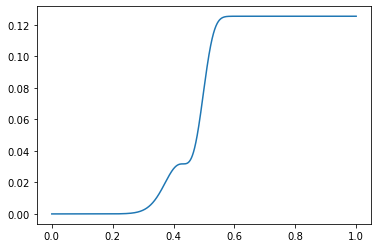

In [7]:
t=0
plt_x1 = grid[t][3:len(grid[0])-3]

plt.plot(plt_x1,m[0][3:len(m[0])-3])

# Styling plots

In [8]:
plt.rcParams.update({'font.size': 12})

# Plotting data with resolutions 1 and 2 and differences 

Value of Derpsi at the origin over time

3247


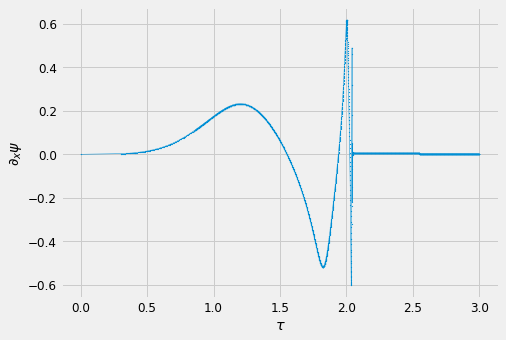

In [27]:
derpsiplt=[]
for i in range(0, len(derpsi)):
    derpsiplt.append(derpsi[i][3]) #saving derpsi at the origin for each timestep

print(len(derpsiplt))
with plt.style.context('fivethirtyeight'):
    
    plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (7,5)  
    plt.xlabel("$\u03C4$")
    plt.ylabel("$\partial_x \psi$")
    plt.plot(time,derpsiplt,linewidth=0.5)
    plt.scatter(time,derpsiplt,s=0.5)
    #plt.xlim([1.9,2.09])
    plt.show()

Monitor ratio over time

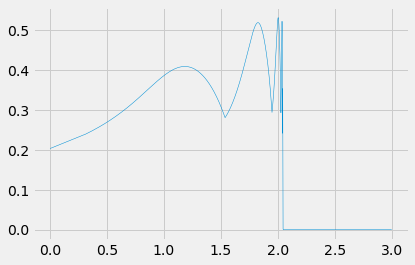

In [14]:
L=len(m[0])

monitor_ratio=[]
for t in range(0,len(m)-1):
    aux=[]
    for x in range(4,L-3):
        aux.append(2*m[t][x]*(1-grid[t][x])/grid[t][x])
    monitor_ratio.append(max(aux))
    

with plt.style.context('fivethirtyeight'):
    plt.plot(time[0:len(time)-1],monitor_ratio,linewidth=0.5)
    plt.show()

Finding zero crossings

In [16]:
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(time, derpsiplt, s=0)

roots=spl.roots()
len(roots)

11

In [20]:
k=2
tau_star=(roots[0+k]*roots[3+k]-roots[1+k]*roots[2+k])/(roots[0+k]-roots[1+k]-roots[2+k]+roots[3+k])
tau_star

2.044049473875573

In [21]:
roots[k:(k+3)+1]

array([1.93953258, 2.02519329, 2.04023686, 2.04336163])

In [22]:
#tau_star=1.034 #THIS IS GOOD! or k=2

In [23]:
#adapt_time = [-math.log(abs((tau_star-x))) for x in time[0:len(time)-1]]#0:len(time)-step:step]] #ignoring last timestep, where log(0)

adapt_time=[]

for x in time:
    if x<=tau_star:
        adapt_time.append(-math.log(abs((tau_star-x))))

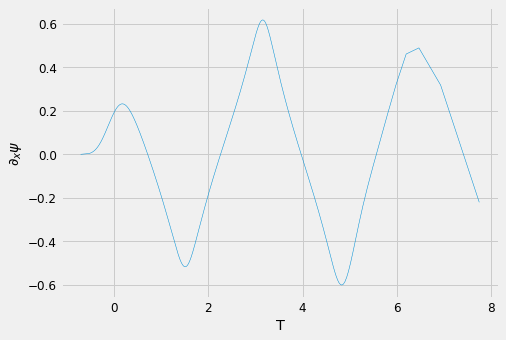

In [24]:
   
with plt.style.context('fivethirtyeight'):
    
    plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (7,5)  
    plt.xlabel("T")#
    plt.ylabel("$\partial_x \psi$")
    plt.plot(adapt_time,derpsiplt[0:len(adapt_time)],linewidth=0.5)
    plt.show()

$\beta$ at scri+

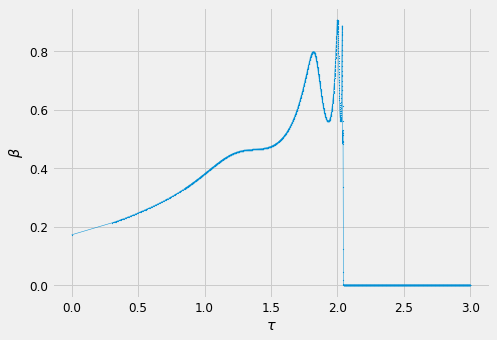

In [28]:
betaplt=[]
for i in range(0, len(derpsi)):
    betaplt.append(beta[i][len(beta[0])-4]) #saving derpsi at the origin for each timestep

with plt.style.context('fivethirtyeight'):
    
    plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (7,5)  
    plt.xlabel("$\u03C4$")#T
    plt.ylabel(r'$ \beta $')
    plt.plot(time,betaplt,linewidth=0.5)
    plt.scatter(time,betaplt,s=0.5)
    #plt.plot(adapt_time,mplt[0:len(adapt_time)],linewidth=0.5)
    #plt.xlim([1,1.05])
    plt.show()

Bondi mass at scri+

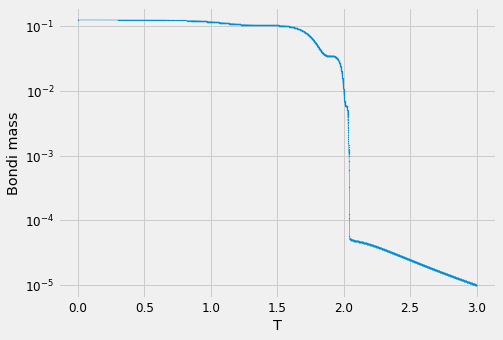

In [35]:
mplt=[]
for i in range(0, len(derpsi)):
    mplt.append(m[i][len(m[0])-4]) #saving derpsi at the origin for each timestep

with plt.style.context('fivethirtyeight'):
    
    plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (7,5)  
    plt.ylabel("Bondi mass")
    
    
    # time
    plt.scatter(time,mplt,s=0.5)
    plt.plot(time,mplt,linewidth=0.5)
    #plt.xlim([.8,1.04])
    #plt.ylim([-0.001,0.002])
    plt.yscale('log')
    plt.xlabel("$\u03C4$")#T
    
    # adapt time
    
    #plt.plot(adapt_time,np.array(mplt[0:len(adapt_time)]),linewidth=0.5)
    plt.yscale('log')
    #plt.xlim([2.55,2.6])
    #plt.ylim([-0.001,0.001])
    plt.xlabel("T")
    
    plt.show()

In [ ]:
(u,m)=(3,e-5) (2,e-4)

In [1]:
(10^(-5)-10^(-4))/1

7.0

ValueError: x and y must be the same size

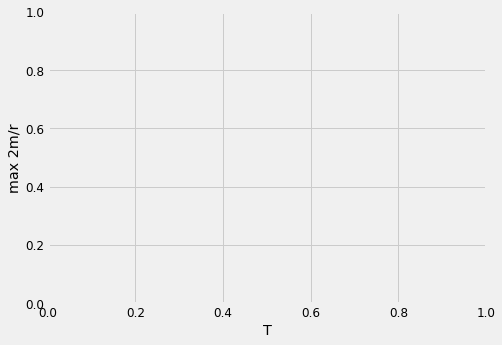

In [30]:
with plt.style.context('fivethirtyeight'):
    
    plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (7,5)  
    plt.xlabel("T")#)"$\u03C4$")
    plt.ylabel("max 2m/r")
    plt.ylim([0,1])
    plt.scatter(t,monitor_ratio)
    #plt.axvline(x = 3.05, color = 'black', linestyle = 'solid', alpha=0.9,linewidth=1)
    #plt.axvline(x = 4.95, color = 'black', linestyle = 'solid', alpha=0.9,linewidth=1)

In [174]:
4.95-3.05

1.9000000000000004

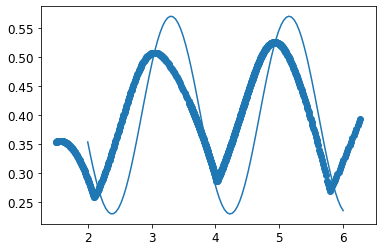

In [157]:
plt.scatter(tau[600:1400],monitor_ratio[600:1400])


auxx=np.linspace(2,6,100)
y=f(auxx,0.17,2.9,0.4,3.4)
plt.plot(auxx,y)

In [148]:
#import numpy as np

#import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

def func(x,a,delta,c,d):
    #[a, delta, c, d]=pars
    return a * math.sin(d*x + delta) + c

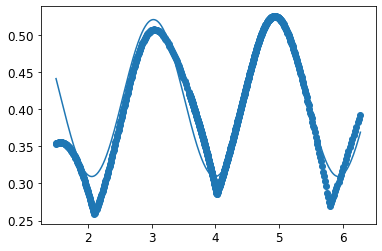

In [151]:
f=np.vectorize(func)


# fit
guess = [0.17,2.9,0.4,3.4]

pars, cov = curve_fit(f, t[600:1400],monitor_ratio[600:1400], p0=guess, maxfev=5000)

pars

plt.plot(t[600:1400], f(t[600:1400],pars[0],pars[1],pars[2],pars[3]))
plt.scatter(t[600:1400],monitor_ratio[600:1400])
plt.show()

psi(tau)

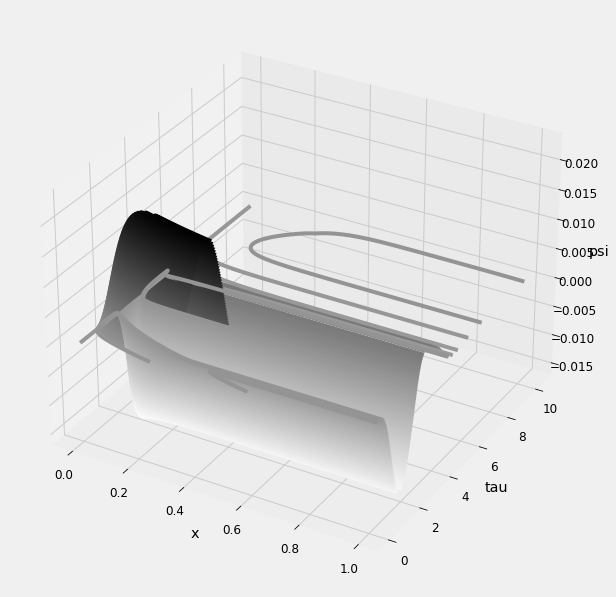

In [30]:
x = grid[0][3:len(grid[0])-3]
y = t

X, Y = np.meshgrid(x, y)

Z = []

for i in range(0,len(y)):
    Z.append(psi[i][3:len(grid[0])-3])

with plt.style.context('fivethirtyeight'):
    
    plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (10,10)  

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 100, cmap='binary')
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('psi');